In [ ]:
Train_VGG16 = True
TVGG16_epochs = 20
painters = ["Mondriaan","Rubens","Picasso"]
sampling_method = "oversampling"
Paintings_Retrieval_Module_Path = "gdrive/MyDrive/Peter Vantomme - DEEP LEARNING PAINTINGS/DL_Paintings_Retrieve.ipynb"

In [ ]:
from google.colab import drive
import os
import shutil
import pickle
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras 
from tensorflow.keras import layers  
import matplotlib.pyplot as plt

drive.mount("/content/gdrive")
shutil.copyfile(Paintings_Retrieval_Module_Path,os.getcwd()+"/DL_Paintings_Retrieve.ipynb")

Mounted at /content/gdrive


'/content/DL_Paintings_Retrieve.ipynb'

In [ ]:
!pip install import-ipynb
import import_ipynb
import DL_Paintings_Retrieve as data_r

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=a1c0f5dbcba249bb2b221a01049245735050f5b984b2d5857aa3645948cd6900
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb
importing Jupyter notebook from DL_Paintings_Retrieve.ipynb
     |████████████████████████████████| 77 kB 3.3 MB/s 


In [ ]:
data_manager = data_r.Data_Setup(painters=painters, resize_mode="none", sampling_method=sampling_method)
shape = tuple(data_manager.get_shape_avg())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
patool: Extracting Mondriaan.rar ...
patool: running /usr/bin/unrar x -- /content/Mondriaan.rar
patool:     with cwd='Input'
patool: ... Mondriaan.rar extracted to `Input'.
patool: Extracting Rubens.rar ...
patool: running /usr/bin/unrar x -- /content/Rubens.rar
patool:     with cwd='Input'
patool: ... Rubens.rar extracted to `Input'.
patool: Extracting Picasso.rar ...
patool: running /usr/bin/unrar x -- /content/Picasso.rar
patool:     with cwd='Input'
patool: ... Picasso.rar extracted to `Input'.

No resize done.

---- Mondriaan ----
{'Train': 231, 'Test': 33, 'Val': 66}
---- Rubens ----
{'Train': 477, 'Test': 68, 'Val': 137}
---- Picasso ----
{'Train': 1070, 'Test': 153, 'Val': 306}


Copying files: 2541 files [00:02, 890.44 files/s]


New training size: 1070 Mondriaan
New training size: 1070 Rubens
New training size: 1070 Picasso
Mondriaan
Rubens
Picasso
Mondriaan
Rubens
Picasso


In [ ]:
train_dataset = image_dataset_from_directory(
    "Datasets/train",
    image_size=shape,
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "Datasets/val",
    image_size=shape,
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "Datasets/test",
    image_size=shape,
    batch_size=32)

Found 1777 files belonging to 3 classes.
Found 253 files belonging to 3 classes.
Found 511 files belonging to 3 classes.


In [ ]:
def start_training(model, filename, epochs=30):
  callbacks = [
      keras.callbacks.ModelCheckpoint(
          filepath=filename+".keras",
          save_best_only=True,
          monitor="val_loss")
  ]
  history = model.fit(
      train_dataset,
      epochs=epochs,
      validation_data=validation_dataset,
      callbacks=callbacks)
  return history

In [ ]:
def plot_results(history):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, accuracy, "bo", label="Training accuracy")
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()

In [ ]:
def test_model(alg_filename):
  test_model = keras.models.load_model(alg_filename+".keras")
  test_loss, test_acc = test_model.evaluate(test_dataset) 
  print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
def save_model(savename, model):
  filename = savename+".sav"
  pickle.dump(model, open(filename, 'wb'))

In [ ]:
def load_model(savename):
  return pickle.load(savename)

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False
)
conv_base.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
def construct_VGG16_DA_model():
  data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
  )
  
  inputs = keras.Input(shape=(shape[0], shape[1], 3))
  x = data_augmentation(inputs)
  x = keras.applications.vgg16.preprocess_input(x)
  x = conv_base(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256)(x)
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(3, activation="softmax")(x)
  model = keras.Model(inputs, outputs)
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

  return model


---- Training & testing of VGG16 model for three painters ----


---- Training ----

Epoch 1/20
56/56 [==============================] - 347s 5s/step - loss: 192.8007 - accuracy: 0.8244 - val_loss: 19.4322 - val_accuracy: 0.9605
Epoch 2/20
56/56 [==============================] - 167s 3s/step - loss: 64.8076 - accuracy: 0.9043 - val_loss: 14.2789 - val_accuracy: 0.9605
Epoch 3/20
56/56 [==============================] - 165s 3s/step - loss: 51.3058 - accuracy: 0.9297 - val_loss: 32.4428 - val_accuracy: 0.9249
Epoch 4/20
56/56 [==============================] - 165s 3s/step - loss: 26.4177 - accuracy: 0.9522 - val_loss: 51.5020 - val_accuracy: 0.9209
Epoch 5/20
56/56 [==============================] - 165s 3s/step - loss: 26.3749 - accuracy: 0.9533 - val_loss: 15.8422 - val_accuracy: 0.9723
Epoch 6/20
56/56 [==============================] - 165s 3s/step - loss: 20.3973 - accuracy: 0.9600 - val_loss: 33.4600 - val_accuracy: 0.9368
Epoch 7/20
56/56 [==============================] - 165

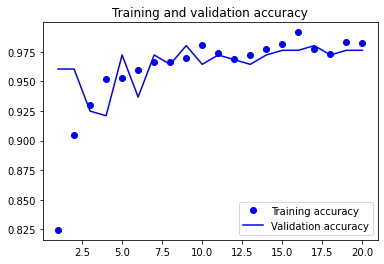

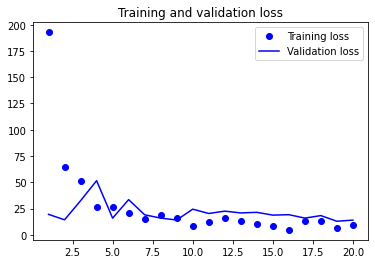


---- Test ----

16/16 [==============================] - 106s 7s/step - loss: 27.2803 - accuracy: 0.9609
Test accuracy: 0.961


In [ ]:
if Train_VGG16:
  print("\n---- Training & testing of VGG16 model for three painters ----\n")
  filename = "3P_VGG16"
  P3_VGG16_model_DA = construct_VGG16_DA_model()
  print("\n---- Training ----\n")
  history = start_training(P3_VGG16_model_DA, filename, epochs=TVGG16_epochs)
  print("\n---- Results ----\n")
  plot_results(history)
  print("\n---- Test ----\n")
  test_model(filename)
else:
  print("\n---- Training & testing of VGG16 model for two painters skipped ----\n")